In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [44]:
df=pd.read_csv('Dentistry Dataset.csv')
df.head()

,Sl No,Sample ID,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,1,NaN,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,2,NaN,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,3,NaN,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,4,NaN,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,5,NaN,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [3]:
df.drop(columns=['Sl No', 'Sample ID'], axis=1, inplace =True)

In [4]:
df.head()

,Age,Gender,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,24,Female,25.06,25.05,6.08,6.08,6.09,6.10,0.242,0.242,0.242,0.241
1,22,Female,25.78,25.79,6.13,6.13,6.33,6.33,0.237,0.237,0.247,0.247
2,23,Female,23.83,23.83,5.91,5.96,6.28,6.28,0.248,0.248,0.264,0.264
3,20,Female,26.12,26.12,6.08,6.08,6.56,6.56,0.232,0.232,0.250,0.250
4,20,Female,26.36,26.41,6.09,6.09,6.50,6.50,0.231,0.231,0.246,0.246


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              1100 non-null   int64  
 1   Gender                           1100 non-null   object 
 2   inter canine distance intraoral  1100 non-null   float64
 3   intercanine distance casts       1100 non-null   float64
 4   right canine width intraoral     1100 non-null   float64
 5   right canine width casts         1100 non-null   float64
 6   left canine width intraoral      1100 non-null   float64
 7   left canine width casts          1100 non-null   float64
 8   right canine index intra oral    1100 non-null   float64
 9   right canine index casts         1100 non-null   float64
 10  left canine index intraoral      1100 non-null   float64
 11  left canine index casts          1100 non-null   float64
dtypes: float64(10), int6

In [6]:
df.isnull().sum()

Age                                0
Gender                             0
inter canine distance intraoral    0
intercanine distance casts         0
right canine width intraoral       0
right canine width casts           0
left canine width intraoral        0
left canine width casts            0
right canine index intra oral      0
right canine index casts           0
left canine index intraoral        0
left canine index casts            0
dtype: int64

In [7]:
num_feat=[features for features in df.columns if df[features].dtype!='O']
cat_feat=[features for features in df.columns if df[features].dtype=='O']

In [8]:
num_feat, cat_feat

(['Age',
  'inter canine distance intraoral',
  'intercanine distance casts',
  'right canine width intraoral',
  'right canine width casts',
  'left canine width intraoral',
  'left canine width casts',
  'right canine index intra oral',
  'right canine index casts',
  'left canine index intraoral',
  'left canine index casts'],
 ['Gender'])

# UNIVARIATE ANALYSIS

# Numerical features Univariate Analysis

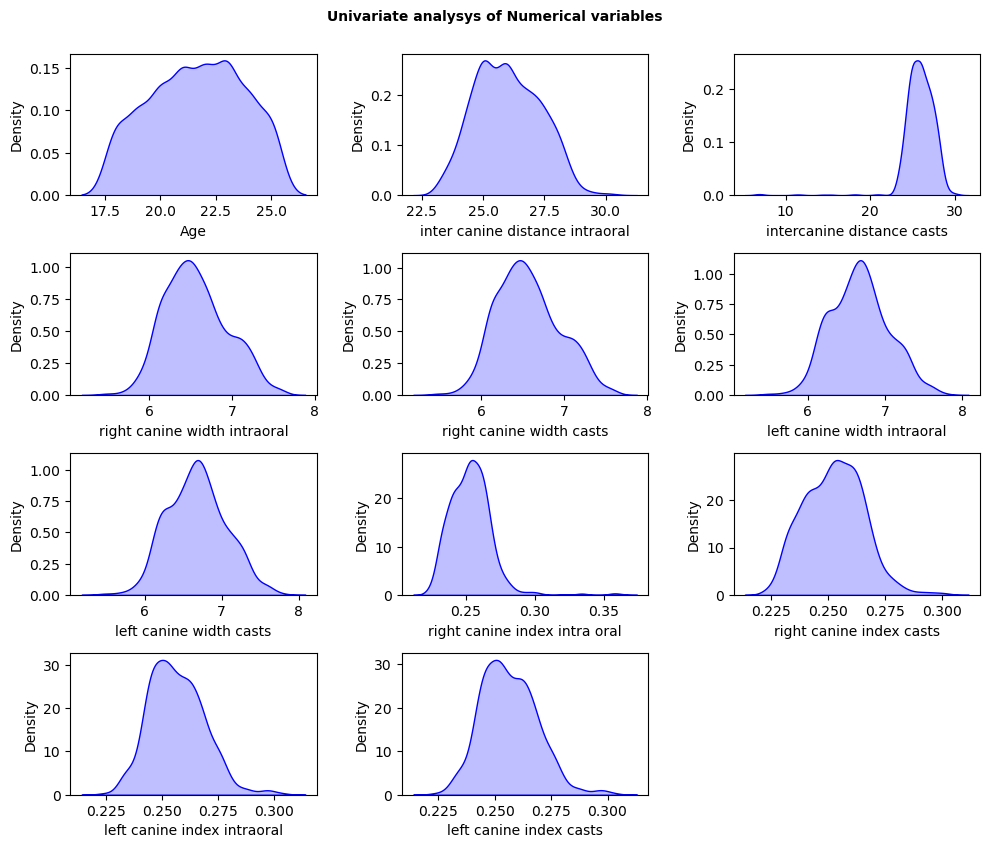

In [9]:
plt.figure(figsize=(10,10))
plt.suptitle('Univariate analysys of Numerical variables', fontsize =10, fontweight='bold', y=1)

for i in range(0,len(num_feat)):
    plt.subplot(5,3,i+1)
    sns.kdeplot(x=df[num_feat[i]], shade=True, color='b')
    plt.xlabel(num_feat[i])
    plt.tight_layout()

# catagorical variale analysis

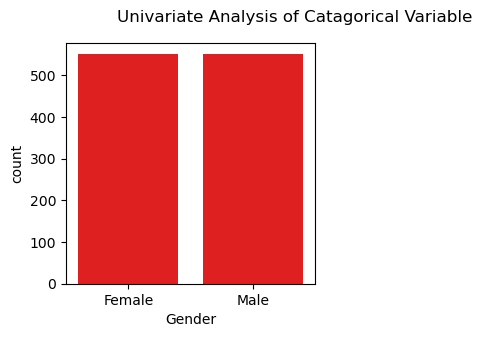

In [10]:
plt.figure(figsize=(6,6))
plt.suptitle('Univariate Analysis of Catagorical Variable')

for i in range(0, len(cat_feat)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat_feat[i]],color='r', data=df)
    plt.xlabel(cat_feat[i])
    plt.tight_layout()

In [11]:
df[cat_feat].value_counts()

Gender
Female    550
Male      550
dtype: int64

# BOXPLOT to find Outliers

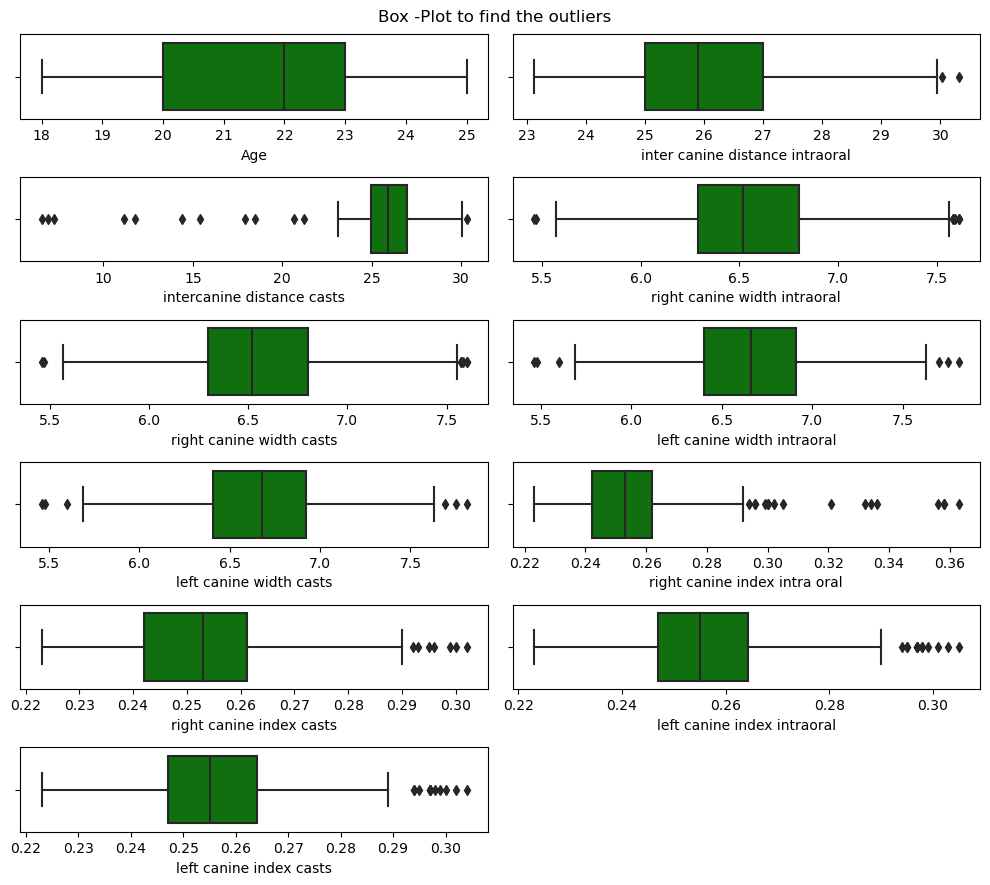

In [12]:
plt.figure(figsize=(10,10))
plt.suptitle('Box -Plot to find the outliers')

for i in range (0,len(num_feat)):
    plt.subplot(7,2,i+1)
    sns.boxplot(x=df[num_feat[i]], data=df,color='g')
    plt.xlabel(num_feat[i])
    plt.tight_layout()

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1100.0,21.625455,2.085892,18.000,20.0000,22.000,23.00000,25.000
inter canine distance intraoral,1100.0,25.989009,1.315292,23.120,25.0000,25.900,26.99250,30.310
intercanine distance casts,1100.0,25.880082,1.862323,6.540,24.9800,25.900,27.00000,30.310
right canine width intraoral,1100.0,6.563000,0.379035,5.460,6.2900,6.520,6.80250,7.610
right canine width casts,1100.0,6.564491,0.377553,5.460,6.3000,6.520,6.80250,7.600
left canine width intraoral,1100.0,6.669627,0.375841,5.460,6.4000,6.660,6.91000,7.810
left canine width casts,1100.0,6.675018,0.377098,5.460,6.4075,6.680,6.92000,7.810
right canine index intra oral,1100.0,0.253122,0.015344,0.223,0.2420,0.253,0.26200,0.363
right canine index casts,1100.0,0.252355,0.012892,0.223,0.2420,0.253,0.26125,0.302
left canine index intraoral,1100.0,0.256453,0.012355,0.223,0.2470,0.255,0.26425,0.305


In [14]:
df.columns

Index(['Age', 'Gender', 'inter canine distance intraoral',
       'intercanine distance casts', 'right canine width intraoral',
       'right canine width casts', 'left canine width intraoral',
       'left canine width casts', 'right canine index intra oral',
       'right canine index casts', 'left canine index intraoral',
       'left canine index casts'],
      dtype='object')

In [15]:
X=df[['inter canine distance intraoral',
       'intercanine distance casts', 'right canine width intraoral',
       'right canine width casts', 'left canine width intraoral',
       'left canine width casts', 'right canine index intra oral',
       'right canine index casts', 'left canine index intraoral',
       'left canine index casts']]
y=df['Gender']

In [16]:
y.head()

0    Female
1    Female
2    Female
3    Female
4    Female
Name: Gender, dtype: object

In [17]:
gender_map={'Female':0,'Male':1}
df['Gender']=df['Gender'].map(gender_map)
df['Gender']=df['Gender'].astype(int)
df['Gender'].dtype

dtype('int32')

In [18]:
y=df['Gender']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int32

In [19]:
X.corr()

,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
inter canine distance intraoral,1.000000,0.755648,0.564793,0.566652,0.601423,0.590075,-0.382836,-0.352744,-0.343861,-0.338299
intercanine distance casts,0.755648,1.000000,0.400577,0.402120,0.435529,0.357952,-0.308260,-0.297661,-0.283392,-0.279846
right canine width intraoral,0.564793,0.400577,1.000000,0.999832,0.941932,0.937016,0.434863,0.570471,0.506583,0.510783
right canine width casts,0.566652,0.402120,0.999832,1.000000,0.943088,0.938069,0.432951,0.568764,0.506022,0.510247
left canine width intraoral,0.601423,0.435529,0.941932,0.943088,1.000000,0.994120,0.341201,0.473677,0.540797,0.545525
left canine width casts,0.590075,0.357952,0.937016,0.938069,0.994120,1.000000,0.346256,0.479567,0.546163,0.551036
right canine index intra oral,-0.382836,-0.308260,0.434863,0.432951,0.341201,0.346256,1.000000,0.876839,0.799557,0.798836
right canine index casts,-0.352744,-0.297661,0.570471,0.568764,0.473677,0.479567,0.876839,1.000000,0.922306,0.921592
left canine index intraoral,-0.343861,-0.283392,0.506583,0.506022,0.540797,0.546163,0.799557,0.922306,1.000000,0.999323
left canine index casts,-0.338299,-0.279846,0.510783,0.510247,0.545525,0.551036,0.798836,0.921592,0.999323,1.000000


<Axes: >

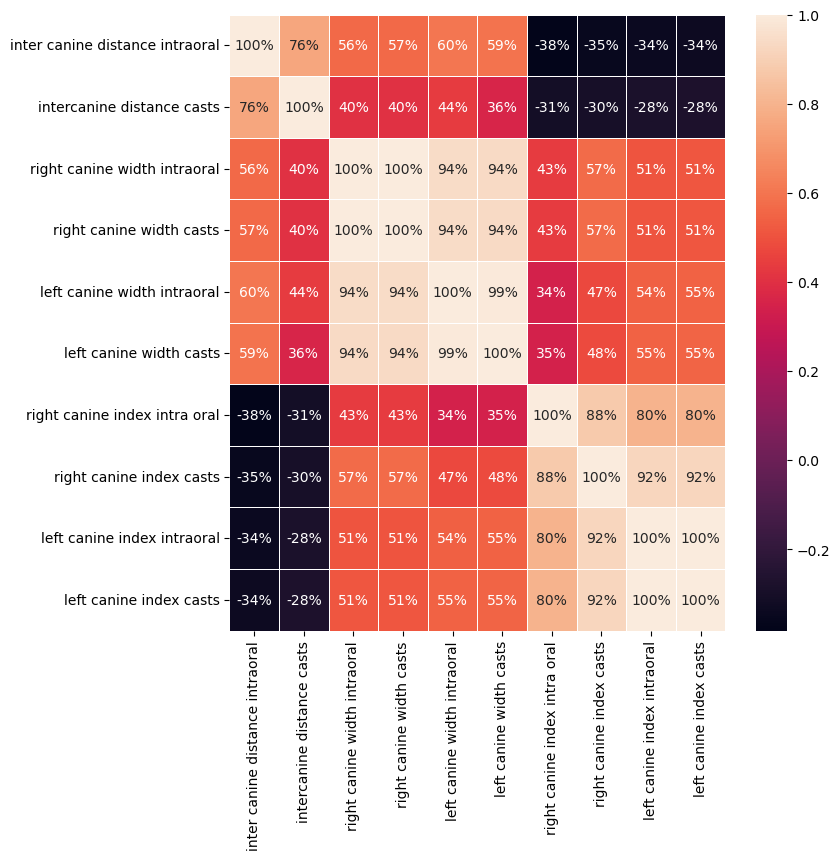

In [20]:

plt.figure(figsize=(8,8))
sns.heatmap(data=X.corr(), annot=True, fmt='0.0%', linewidth=0.5)

# scaling the data using standardized Scaler approch

In [21]:
from sklearn.preprocessing import StandardScaler
standardized=StandardScaler()
std_df=pd.DataFrame(standardized.fit_transform(X), columns=X.columns)
std_df.head()

,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,-0.706635,-0.445927,-1.274870,-1.283825,-1.542915,-1.525546,-0.725166,-0.803515,-1.170283,-1.241960
1,-0.158979,-0.048393,-1.142895,-1.151332,-0.904057,-0.915347,-1.051176,-1.191516,-0.765417,-0.756848
2,-1.642214,-1.101321,-1.723581,-1.601806,-1.037152,-1.047999,-0.333953,-0.337914,0.611127,0.617636
3,0.099636,0.128886,-1.274870,-1.283825,-0.291818,-0.305148,-1.377187,-1.579518,-0.522498,-0.514292
4,0.282188,0.284676,-1.248475,-1.257326,-0.451532,-0.464330,-1.442389,-1.657118,-0.846390,-0.837700


# Boxplot after scale down the data

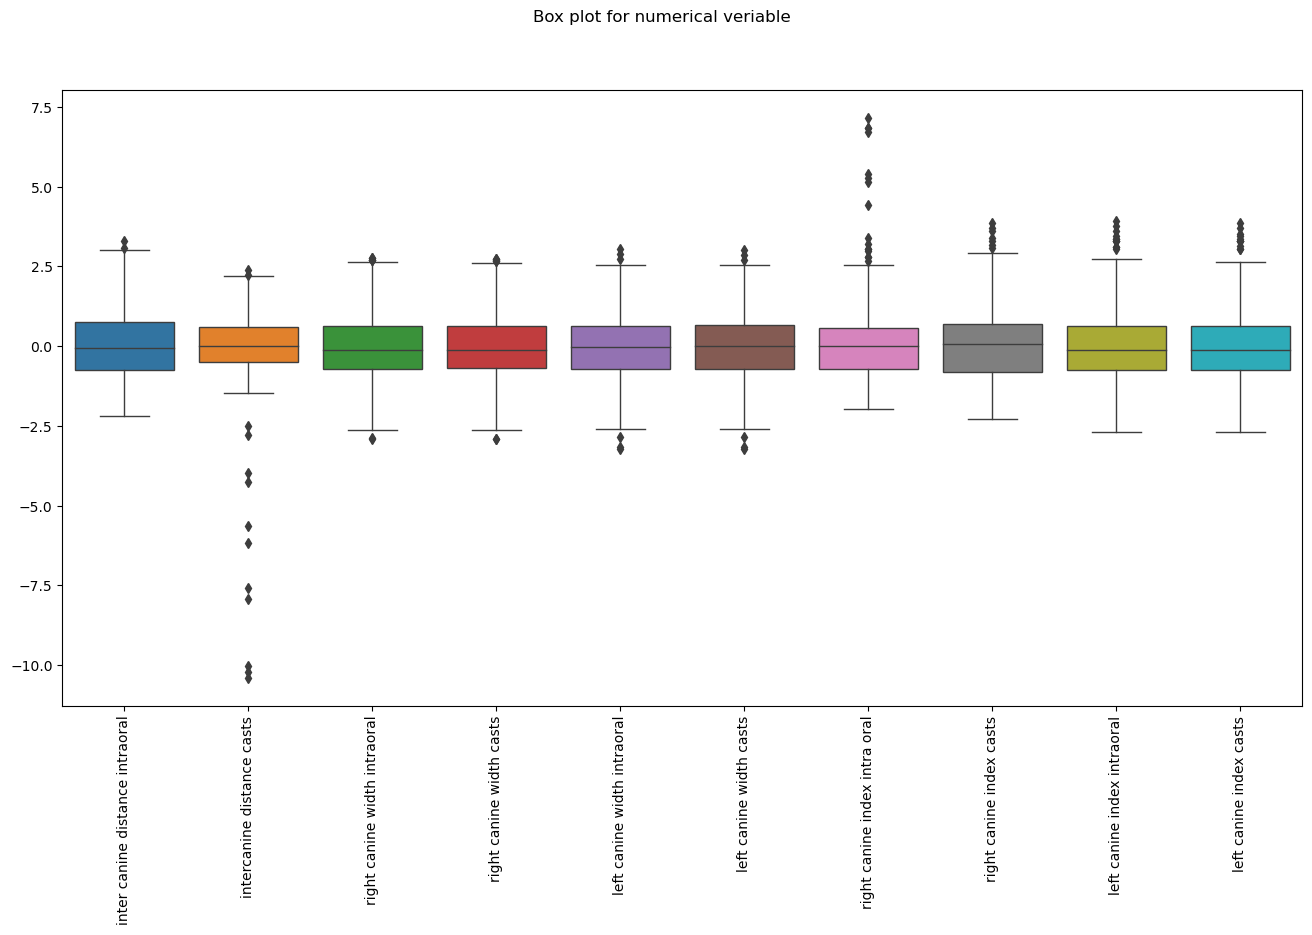

In [22]:
plt.figure(figsize=(16,8))
plt.suptitle('Box plot for numerical veriable')
sns.boxplot(data=std_df,linewidth=1)
plt.xticks(rotation='vertical')
plt.show()


# capping the data using IQR method

In [23]:
def replace_outlier(std_df,columns):
    for col in columns:
        
        Q1=std_df[col].quantile(0.25)
        
        Q3=std_df[col].quantile(0.75)
        
        IQR=Q3-Q1
        
        lower_bound= Q1 - 1.5* IQR
        
        upper_bound= Q3+1.5*IQR
        
        std_df.loc[(std_df[col]>upper_bound),col]=upper_bound
        std_df.loc[(std_df[col]<lower_bound),col]= lower_bound
        
    return std_df

In [24]:
col_to_replace =['inter canine distance intraoral', 'intercanine distance casts',
       'right canine width intraoral', 'right canine width casts',
       'left canine width intraoral', 'left canine width casts',
       'right canine index intra oral', 'right canine index casts',
       'left canine index intraoral', 'left canine index casts']
std_df= replace_outlier(std_df,col_to_replace)

In [25]:
std_df.head()

,inter canine distance intraoral,intercanine distance casts,right canine width intraoral,right canine width casts,left canine width intraoral,left canine width casts,right canine index intra oral,right canine index casts,left canine index intraoral,left canine index casts
0,-0.706635,-0.445927,-1.274870,-1.283825,-1.542915,-1.525546,-0.725166,-0.803515,-1.170283,-1.241960
1,-0.158979,-0.048393,-1.142895,-1.151332,-0.904057,-0.915347,-1.051176,-1.191516,-0.765417,-0.756848
2,-1.642214,-1.101321,-1.723581,-1.601806,-1.037152,-1.047999,-0.333953,-0.337914,0.611127,0.617636
3,0.099636,0.128886,-1.274870,-1.283825,-0.291818,-0.305148,-1.377187,-1.579518,-0.522498,-0.514292
4,0.282188,0.284676,-1.248475,-1.257326,-0.451532,-0.464330,-1.442389,-1.657118,-0.846390,-0.837700


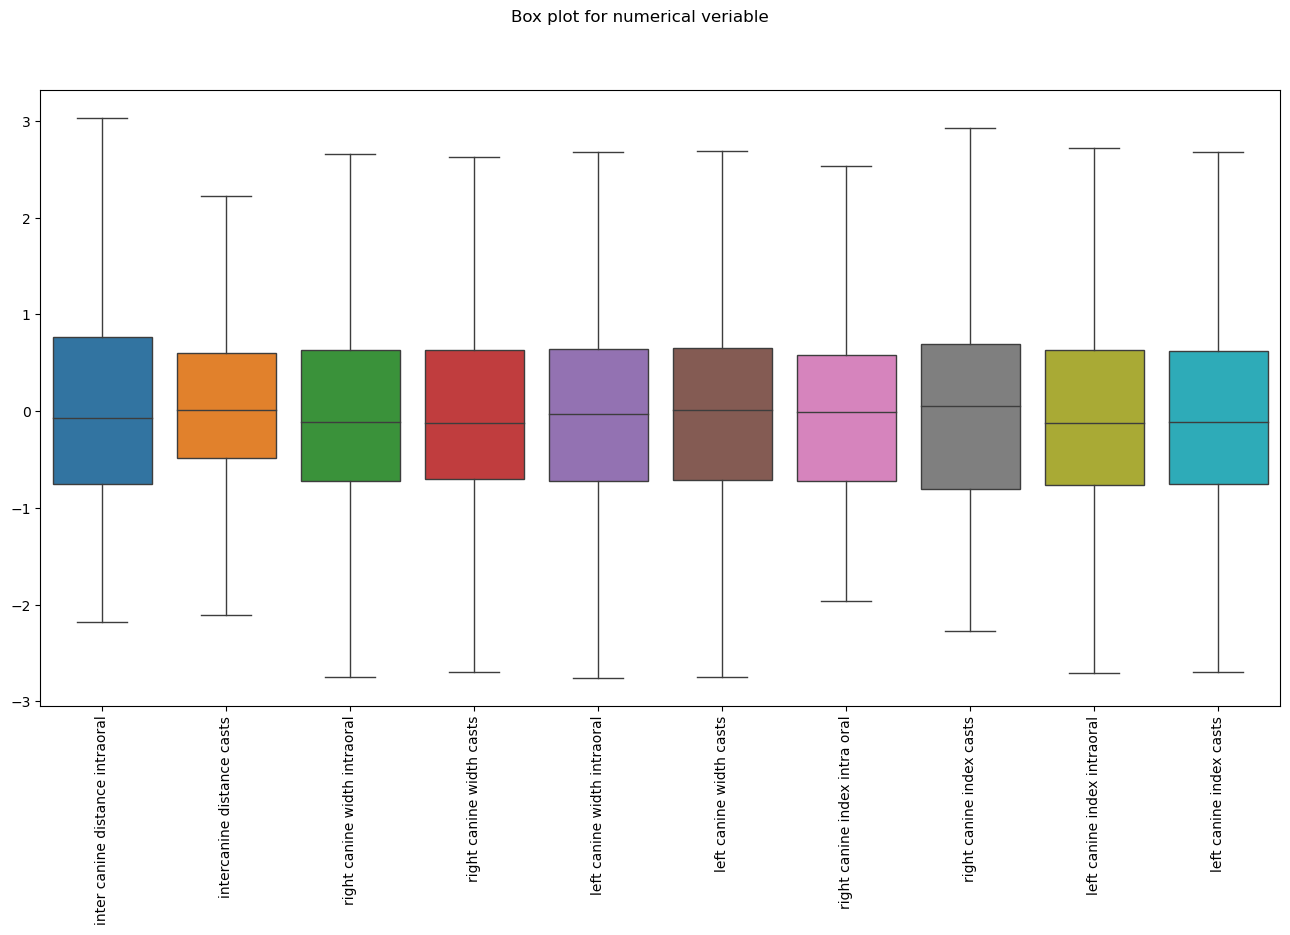

In [26]:
plt.figure(figsize=(16,8))
plt.suptitle('Box plot for numerical veriable')
sns.boxplot(data=std_df,linewidth=1)
plt.xticks(rotation='vertical')
plt.show()

# Feature selection methode for Best Feature

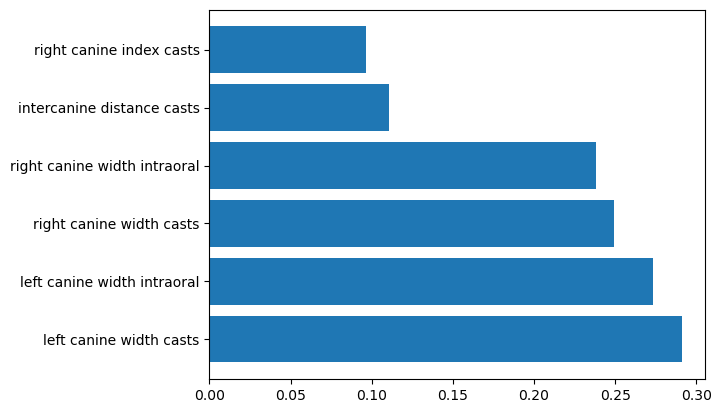

In [27]:
from sklearn.feature_selection import mutual_info_classif

std_mic=mutual_info_classif(std_df,y)

std_data=pd.Series(std_mic, index=std_df.columns)

std_top6=std_data.nlargest(6)

plt.barh(std_top6.index, std_top6.values)

plt.show()

# Model Building

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [29]:
# creating dataframe

std_top6_df=std_df[std_top6.index]
std_top6_df.head()

,left canine width casts,left canine width intraoral,right canine width casts,right canine width intraoral,intercanine distance casts,right canine index casts
0,-1.525546,-1.542915,-1.283825,-1.274870,-0.445927,-0.803515
1,-0.915347,-0.904057,-1.151332,-1.142895,-0.048393,-1.191516
2,-1.047999,-1.037152,-1.601806,-1.723581,-1.101321,-0.337914
3,-0.305148,-0.291818,-1.283825,-1.274870,0.128886,-1.579518
4,-0.464330,-0.451532,-1.257326,-1.248475,0.284676,-1.657118


In [30]:
std_top6_df.columns

Index(['left canine width casts', 'left canine width intraoral',
       'right canine width casts', 'right canine width intraoral',
       'intercanine distance casts', 'right canine index casts'],
      dtype='object')

# model building with Standardized Data

In [31]:
# spliting the data

X_train, X_test, y_train, y_test =train_test_split(std_top6_df,y,test_size=0.2,random_state=30)

In [32]:
models={'LogisticRegression': LogisticRegression(),
       'KNN':KNeighborsClassifier(),
       'DecisionTreeClassifier':DecisionTreeClassifier(),
       'RandomForestClassifier':RandomForestClassifier(),
       'AdaBoostClassifier':AdaBoostClassifier(),
       'xgboost':XGBClassifier(),
       'cataboost':CatBoostClassifier(),
       'GradientBoostingClassifier':GradientBoostingClassifier(),
       'GaussianNB':GaussianNB(),
       'SVC':SVC()}

def evaluation_std(true,predict):
    accuracy=accuracy_score(true,predict)
    precision=precision_score(true,predict)
    recall=recall_score(true,predict)
    f1=f1_score(true,predict)
    confusion=confusion_matrix(true,predict)
    
    return accuracy,precision,recall,f1,confusion

results_std={}

for name, model in models.items():
    model.fit(X_train,y_train)
    
    y_pred=model.predict(X_test)
    
    accuracy,precision,recall,f1,confusion =evaluation_std(y_test, y_pred)
    
    results_std[name]= {'accuracy': accuracy,
                       'precision': precision,
                       'recall' : recall,
                       'f1': f1,
                       'confusion': confusion}
    
    print(f'{name}:')
    print(f'Accuracy:{accuracy:0.2f}')
    print(f'Precision:{precision:0.2f}')
    print(f'Recall:{recall:0.2f}')
    print(f'F1:{f1:0.2f}')
    print(f'Confusuin Matrix:\n{confusion}\n')

LogisticRegression:
Accuracy:0.83
Precision:0.86
Recall:0.80
F1:0.83
Confusuin Matrix:
[[91 15]
 [23 91]]

KNN:
Accuracy:0.84
Precision:0.86
Recall:0.83
F1:0.84
Confusuin Matrix:
[[90 16]
 [19 95]]

DecisionTreeClassifier:
Accuracy:0.87
Precision:0.90
Recall:0.85
F1:0.87
Confusuin Matrix:
[[95 11]
 [17 97]]

RandomForestClassifier:
Accuracy:0.89
Precision:0.92
Recall:0.87
F1:0.89
Confusuin Matrix:
[[97  9]
 [15 99]]

AdaBoostClassifier:
Accuracy:0.85
Precision:0.87
Recall:0.83
F1:0.85
Confusuin Matrix:
[[92 14]
 [19 95]]

xgboost:
Accuracy:0.89
Precision:0.89
Recall:0.89
F1:0.89
Confusuin Matrix:
[[ 94  12]
 [ 12 102]]

Learning rate set to 0.009755
0:	learn: 0.6864372	total: 174ms	remaining: 2m 54s
1:	learn: 0.6786798	total: 188ms	remaining: 1m 34s
2:	learn: 0.6718550	total: 201ms	remaining: 1m 6s
3:	learn: 0.6649370	total: 215ms	remaining: 53.5s
4:	learn: 0.6578026	total: 228ms	remaining: 45.4s
5:	learn: 0.6504055	total: 239ms	remaining: 39.7s
6:	learn: 0.6438214	total: 247ms	remaini

172:	learn: 0.3394630	total: 1.16s	remaining: 5.53s
173:	learn: 0.3389901	total: 1.16s	remaining: 5.52s
174:	learn: 0.3384337	total: 1.17s	remaining: 5.51s
175:	learn: 0.3378919	total: 1.17s	remaining: 5.5s
176:	learn: 0.3374440	total: 1.18s	remaining: 5.48s
177:	learn: 0.3368932	total: 1.18s	remaining: 5.47s
178:	learn: 0.3364451	total: 1.19s	remaining: 5.46s
179:	learn: 0.3359745	total: 1.2s	remaining: 5.44s
180:	learn: 0.3353936	total: 1.2s	remaining: 5.43s
181:	learn: 0.3350144	total: 1.2s	remaining: 5.42s
182:	learn: 0.3346332	total: 1.21s	remaining: 5.4s
183:	learn: 0.3342200	total: 1.21s	remaining: 5.38s
184:	learn: 0.3336516	total: 1.22s	remaining: 5.37s
185:	learn: 0.3331599	total: 1.22s	remaining: 5.35s
186:	learn: 0.3327808	total: 1.23s	remaining: 5.34s
187:	learn: 0.3323007	total: 1.23s	remaining: 5.32s
188:	learn: 0.3315618	total: 1.24s	remaining: 5.31s
189:	learn: 0.3311072	total: 1.24s	remaining: 5.3s
190:	learn: 0.3306263	total: 1.25s	remaining: 5.28s
191:	learn: 0.3301

339:	learn: 0.2793444	total: 1.97s	remaining: 3.83s
340:	learn: 0.2789785	total: 1.98s	remaining: 3.83s
341:	learn: 0.2785866	total: 1.98s	remaining: 3.82s
342:	learn: 0.2783539	total: 1.99s	remaining: 3.81s
343:	learn: 0.2781399	total: 1.99s	remaining: 3.8s
344:	learn: 0.2778266	total: 2s	remaining: 3.8s
345:	learn: 0.2775835	total: 2s	remaining: 3.79s
346:	learn: 0.2772709	total: 2.01s	remaining: 3.78s
347:	learn: 0.2770971	total: 2.01s	remaining: 3.77s
348:	learn: 0.2769301	total: 2.02s	remaining: 3.77s
349:	learn: 0.2767730	total: 2.02s	remaining: 3.76s
350:	learn: 0.2764414	total: 2.03s	remaining: 3.75s
351:	learn: 0.2760552	total: 2.03s	remaining: 3.74s
352:	learn: 0.2758260	total: 2.04s	remaining: 3.73s
353:	learn: 0.2755531	total: 2.04s	remaining: 3.73s
354:	learn: 0.2752453	total: 2.05s	remaining: 3.72s
355:	learn: 0.2748145	total: 2.05s	remaining: 3.71s
356:	learn: 0.2746807	total: 2.06s	remaining: 3.7s
357:	learn: 0.2744138	total: 2.06s	remaining: 3.7s
358:	learn: 0.2743362	

503:	learn: 0.2439509	total: 2.77s	remaining: 2.73s
504:	learn: 0.2437663	total: 2.77s	remaining: 2.72s
505:	learn: 0.2435687	total: 2.78s	remaining: 2.71s
506:	learn: 0.2433276	total: 2.79s	remaining: 2.71s
507:	learn: 0.2431736	total: 2.79s	remaining: 2.7s
508:	learn: 0.2429809	total: 2.8s	remaining: 2.7s
509:	learn: 0.2427971	total: 2.8s	remaining: 2.69s
510:	learn: 0.2426514	total: 2.81s	remaining: 2.69s
511:	learn: 0.2423671	total: 2.81s	remaining: 2.68s
512:	learn: 0.2421658	total: 2.82s	remaining: 2.67s
513:	learn: 0.2419695	total: 2.82s	remaining: 2.67s
514:	learn: 0.2416816	total: 2.83s	remaining: 2.66s
515:	learn: 0.2414441	total: 2.83s	remaining: 2.66s
516:	learn: 0.2411885	total: 2.84s	remaining: 2.65s
517:	learn: 0.2410811	total: 2.84s	remaining: 2.65s
518:	learn: 0.2408484	total: 2.85s	remaining: 2.64s
519:	learn: 0.2406584	total: 2.85s	remaining: 2.63s
520:	learn: 0.2403893	total: 2.86s	remaining: 2.63s
521:	learn: 0.2401085	total: 2.86s	remaining: 2.62s
522:	learn: 0.23

700:	learn: 0.2091419	total: 3.77s	remaining: 1.61s
701:	learn: 0.2088457	total: 3.78s	remaining: 1.6s
702:	learn: 0.2086767	total: 3.79s	remaining: 1.6s
703:	learn: 0.2083416	total: 3.79s	remaining: 1.59s
704:	learn: 0.2081598	total: 3.8s	remaining: 1.59s
705:	learn: 0.2079743	total: 3.8s	remaining: 1.58s
706:	learn: 0.2077849	total: 3.81s	remaining: 1.58s
707:	learn: 0.2077510	total: 3.81s	remaining: 1.57s
708:	learn: 0.2075714	total: 3.82s	remaining: 1.57s
709:	learn: 0.2074112	total: 3.82s	remaining: 1.56s
710:	learn: 0.2072146	total: 3.83s	remaining: 1.56s
711:	learn: 0.2071790	total: 3.83s	remaining: 1.55s
712:	learn: 0.2068813	total: 3.84s	remaining: 1.54s
713:	learn: 0.2068482	total: 3.85s	remaining: 1.54s
714:	learn: 0.2067379	total: 3.85s	remaining: 1.53s
715:	learn: 0.2065538	total: 3.85s	remaining: 1.53s
716:	learn: 0.2063803	total: 3.86s	remaining: 1.52s
717:	learn: 0.2063258	total: 3.87s	remaining: 1.52s
718:	learn: 0.2061134	total: 3.87s	remaining: 1.51s
719:	learn: 0.20

896:	learn: 0.1802492	total: 4.78s	remaining: 549ms
897:	learn: 0.1801036	total: 4.79s	remaining: 544ms
898:	learn: 0.1800806	total: 4.79s	remaining: 539ms
899:	learn: 0.1798533	total: 4.8s	remaining: 533ms
900:	learn: 0.1798167	total: 4.8s	remaining: 528ms
901:	learn: 0.1796863	total: 4.81s	remaining: 522ms
902:	learn: 0.1795539	total: 4.81s	remaining: 517ms
903:	learn: 0.1794038	total: 4.82s	remaining: 512ms
904:	learn: 0.1792510	total: 4.82s	remaining: 506ms
905:	learn: 0.1792033	total: 4.83s	remaining: 501ms
906:	learn: 0.1791136	total: 4.83s	remaining: 496ms
907:	learn: 0.1788845	total: 4.84s	remaining: 490ms
908:	learn: 0.1787081	total: 4.84s	remaining: 485ms
909:	learn: 0.1786704	total: 4.85s	remaining: 480ms
910:	learn: 0.1784623	total: 4.86s	remaining: 474ms
911:	learn: 0.1783833	total: 4.86s	remaining: 469ms
912:	learn: 0.1783558	total: 4.86s	remaining: 464ms
913:	learn: 0.1782804	total: 4.87s	remaining: 458ms
914:	learn: 0.1781568	total: 4.87s	remaining: 453ms
915:	learn: 0.

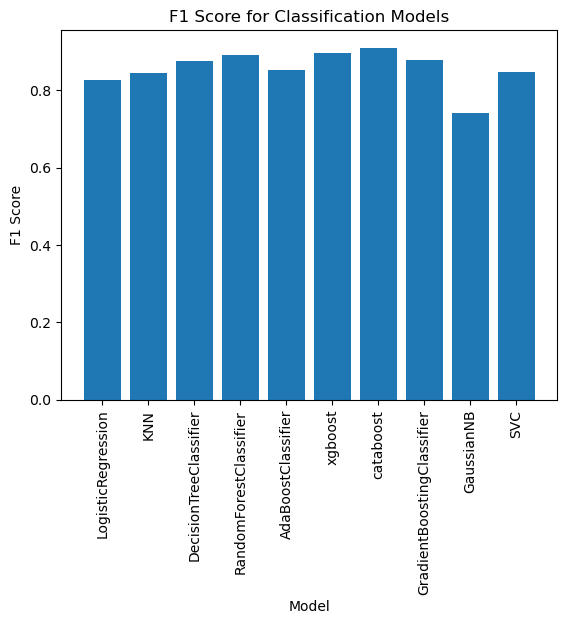

In [33]:
f1_scores=[results_std[name]['f1'] for name in models.keys()]
plt.bar(models.keys(),f1_scores,linewidth=1)
plt.title('F1 Score for Classification Models')
plt.xlabel('Model')
plt.ylabel ('F1 Score')
plt.xticks(rotation='vertical')
plt.show()

In [34]:
# Converting the results to Dataframe for standardized Dataframe

df_results_std =pd.DataFrame.from_dict(results_std,orient='index').drop('confusion',axis=1).sort_values(by='f1',ascending=False)

print (df_results_std)

                            accuracy  precision    recall        f1
cataboost                   0.909091   0.943396  0.877193  0.909091
xgboost                     0.890909   0.894737  0.894737  0.894737
RandomForestClassifier      0.890909   0.916667  0.868421  0.891892
GradientBoostingClassifier  0.877273   0.899083  0.859649  0.878924
DecisionTreeClassifier      0.872727   0.898148  0.850877  0.873874
AdaBoostClassifier          0.850000   0.871560  0.833333  0.852018
SVC                         0.845455   0.877358  0.815789  0.845455
KNN                         0.840909   0.855856  0.833333  0.844444
LogisticRegression          0.827273   0.858491  0.798246  0.827273
GaussianNB                  0.736364   0.754545  0.728070  0.741071


In [35]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from scipy.stats import randint

params ={'n_estimators': randint(100,1000),
        'criterion':['gini','entropy'],
        'min_samples_split':randint(1,10),
        'min_samples_leaf':randint(1,10),
        'max_leaf_nodes':randint(1,100)}

rs1=RandomizedSearchCV(RandomForestClassifier(n_jobs=-1),params,n_iter=50,n_jobs=-1,cv=KFold(n_splits=4),scoring='roc_auc')
rs1.fit(X_train,y_train)

print('Best Score : ',rs1.best_score_)
print('Best Parameters: ',rs1.best_params_)

Best Score :  0.9424176259123379
Best Parameters:  {'criterion': 'entropy', 'max_leaf_nodes': 86, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 396}


In [36]:
rfc=RandomForestClassifier(criterion= 'entropy',max_leaf_nodes= 92, min_samples_leaf= 1,
                           min_samples_split= 2, n_estimators= 320)

rfc.fit(X_train,y_train)

y_pred=rfc.predict(X_test)

accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)

print('Accuracy:',accuracy)
print('Precision:',precision)
print('Recall:',recall)
print('F1:',f1)
print('Confusuin Matrix:',confusion)


Accuracy: 0.8954545454545455
Precision: 0.9174311926605505
Recall: 0.8771929824561403
F1: 0.8968609865470852
Confusuin Matrix: [[ 97   9]
 [ 14 100]]


In [37]:
import pickle

pickle.dump(std_top6_df,open('std_top6_df.pkl','wb'))

pickle.dump(rfc,open('rfc.pkl','wb'))

In [41]:
std_top6_df.tail()

,left canine width casts,left canine width intraoral,right canine width casts,right canine width intraoral,intercanine distance casts,right canine index casts
1095,-0.199026,-0.185341,0.041097,0.044871,-0.854205,1.446892
1096,0.331582,0.347040,0.359078,0.361609,-0.354601,0.981290
1097,-0.172496,-0.158722,0.094093,0.097661,-0.881065,1.524492
1098,-0.039844,-0.025627,0.014598,0.018476,-0.542624,0.903690
1099,0.278521,0.293802,-0.541869,-0.535815,-0.736019,0.515689


In [42]:
y.tail()

1095    1
1096    1
1097    1
1098    1
1099    1
Name: Gender, dtype: int32